In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import pickle


In [2]:
path = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(path)


In [3]:
Types = df.loc[:, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '1').replace('spiral', '0')).astype(int)

X = np.array(df.loc[:, 'petroMag_u':'petroMag_z'])
y = np.array(types)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


low C = อนุญาติให้ data ปนกันน้อย

high C = อนุญาติให้ data ปนกันมาก ,ไม่ค่อยเข้มงวดในการแบ่ง

low gamma = เส้นแบ่งหยักน้อย

high gamma = เส้นแบ่งหยักมาก

In [5]:
C_range = np.logspace(0, 10, 11)
gamma_range = np.logspace(-9, 1, 11)


# RBF Kernel loop version
clf_list = []

for C in C_range:
    for gamma in gamma_range:
        clf_rbfSVC = Pipeline(
            [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))])

        clf_rbfSVC.fit(X_train, y_train)

        train = clf_rbfSVC.score(X_train, y_train)
        test = clf_rbfSVC.score(X_test, y_test)
        clf_list += [(C, gamma, train, test, clf_rbfSVC)]
        
        print('C = ' + str(C) + ', ' + 'gamma = ' + str(gamma))
        print("Test set accuracy = " + str(test))


C = 1.0, gamma = 1e-09

Test set accuracy = 0.529424753492976

C = 1.0, gamma = 1e-08

Test set accuracy = 0.529424753492976

C = 1.0, gamma = 1e-07

Test set accuracy = 0.529424753492976

C = 1.0, gamma = 1e-06

Test set accuracy = 0.529424753492976

C = 1.0, gamma = 1e-05

Test set accuracy = 0.8220657098260175

C = 1.0, gamma = 0.0001

Test set accuracy = 0.8271519396961967

In [ ]:
# max test set

POS = 3
clf_max = (0, 0, 0, 0, 0)

for clf in clf_list:
    if clf_max[POS] < clf[POS]:
        clf_max = clf

C_max = clf_max[0]
gamma_max = clf_max[1]
train_max = clf_max[2]
test_max = clf_max[3]


In [ ]:
print('C = ' + str(C_max) + ', ' + 'gamma = ' + str(gamma_max))
print("Train set accuracy = " + str(train_max))
print("Test set accuracy = " + str(test_max))


C = 1000000000.0, gamma = 0.0001
Train set accuracy = 0.8666666666666667
Test set accuracy = 0.9230769230769231


In [ ]:
# save train-test data
clf_save = open('clf.csv', 'wb')
pickle.dump(clf_list, clf_save)
clf_save.close()


In [ ]:
# load data
clf_read = open('clf.csv', 'rb')
clf_file = pickle.load(clf_read)


In [ ]:
# clf_file = [(C1, gamma1, train1, test1, clf1), (C2, gamma2, train2, test2, clf2), (C3, gamma3, train3, test3, clf3),...]
# *clf_file = (C1, gamma1, train1, test1, clf1) (C2, gamma2, train2, test2, clf2) (C3, gamma3, train3, test3, clf3)...
# zip(*clf_file) = (C1, C2, C3,...), (gamma1, gamma2, gamma3,...), (train1, train2, train3,...), (test1, test2, test3,...), (clf1, clf2, clf3,...) --> อ่านไม่ได้เลยต้องใส่ list

tp = list(zip(*clf_file))
test_array = np.array(tp[3])
test_grid = test_array.reshape(len(C_range), len(gamma_range))


In [ ]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

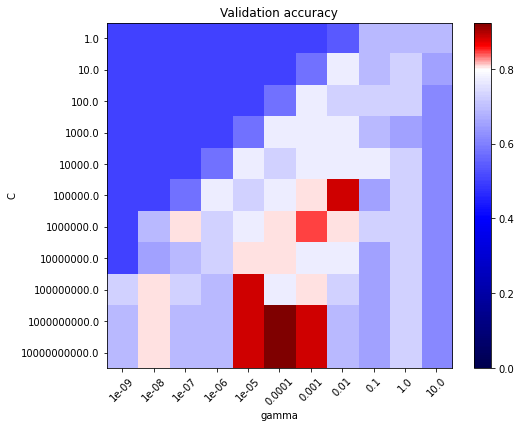

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    test_grid,
    interpolation="nearest",
    cmap=plt.cm.seismic,
    norm=MidpointNormalize(vmin=0, midpoint=0.8),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

(-0.5, 255.5, 1.5, -0.5)

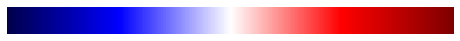

In [ ]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

plt.figure(figsize=(8, 0.5))
plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('seismic'))
plt.axis('off')
